# Project 2 Churn Analysis
## Francis Yang - 12/5/2022

This project is about a very common business problem: analyzing customer churn. In this project, using *supervised learning models*, you will identify cell phone service customers who are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service. Furthermore, it would help to analyze the top factors that influence user retention to guide the company prevent user churn. The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually. You may find solutions to very similar data science problems on many different platforms. It is important that you put all your effort to get to a working solution yourself.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

data = pd.read_csv("datasets/churn.csv")

In [2]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

Correct predictor data type

In [4]:
cmap = {" False.":False, " True.":True}
data['churned'] = data['churned'].replace(cmap)

Correct NaN values and data type

In [5]:
data['total_eve_charge'] = data['total_eve_charge'].replace({'?':np.nan})
data['total_eve_charge'] = data['total_eve_charge'].astype(float)
data['intl_plan'] = data['intl_plan'].astype('category')
data['voice_mail_plan'] = data['voice_mail_plan'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          5000 non-null   object  
 1   account_length                 5000 non-null   int64   
 2   area_code                      5000 non-null   int64   
 3   phone_number                   5000 non-null   object  
 4   intl_plan                      5000 non-null   category
 5   voice_mail_plan                5000 non-null   category
 6   number_vmail_messages          5000 non-null   int64   
 7   total_day_minutes              5000 non-null   float64 
 8   total_day_calls                5000 non-null   int64   
 9   total_day_charge               5000 non-null   float64 
 10  total_eve_minutes              5000 non-null   float64 
 11  total_eve_calls                5000 non-null   int64   
 12  total_eve_charge               499

## Visualization

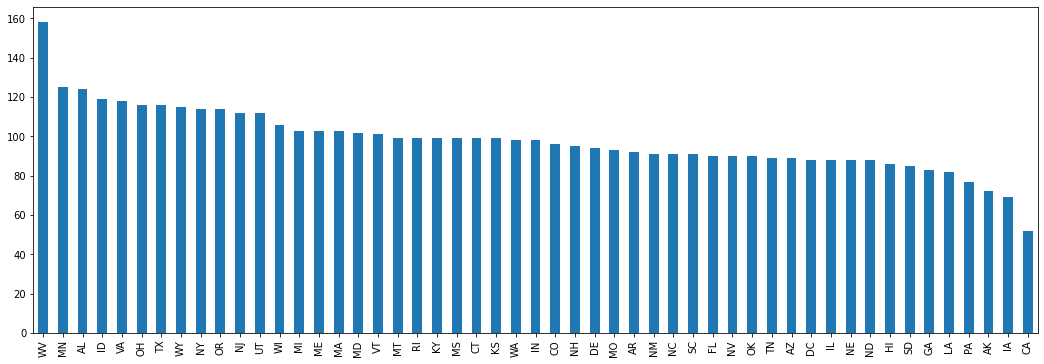

In [7]:
data['state'].value_counts().plot(kind='bar',figsize=(18,6));

Somewhat uniform distribution of samples

In [8]:
data['state'].value_counts().shape

(51,)

Washington DC has its own data.
### Categorical

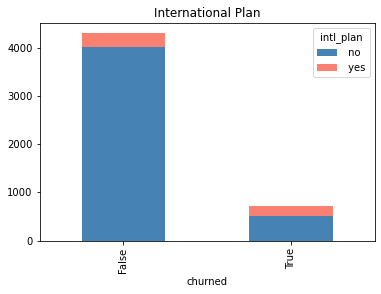

In [9]:
data.groupby(['churned', 'intl_plan']).size().unstack().plot(kind='bar', stacked=True,
                                                             color=['steelblue', 'salmon'], title='International Plan');

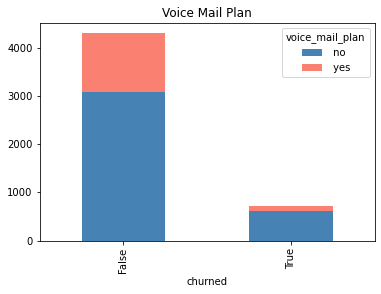

In [10]:
data.groupby(['churned', 'voice_mail_plan']).size().unstack().plot(kind='bar', stacked=True,
                                                                   color=['steelblue', 'salmon'], title='Voice Mail Plan');

### Column Means grouped by State and Area
Group means represented below. Some columns will not make sense like phone number and categorical columns, and are removed automatically.

In [11]:
gc = data.groupby(by=['state','area_code','churned'])

In [12]:
group_means = gc.mean()
group_means

account_length  number_vmail_messages  \
state area_code churned                                          
AK    408       False         83.800000              11.666667   
      415       False        100.676471              12.852941   
                True         112.500000               4.750000   
      510       False        103.722222               2.666667   
                True         152.000000               0.000000   
...                                 ...                    ...   
WY    408       True         141.000000               0.000000   
      415       False         97.625000               8.250000   
                True         110.200000               5.200000   
      510       False         97.250000               9.350000   
                True         103.800000               0.000000   

                         total_day_minutes  total_day_calls  total_day_charge  \
state area_code churned                                                         
AK    408       False           172.906667        97.600000         29.394667   
      415       False           190.905882       103.529412         32.454412   
                True            162.900000        91.500000         27.692500   
      510       False           166.122222        93.000000         28.241111   
                True            302.800000       143.000000         51.480000   
...                                    ...              ...               ...   
WY    408       True            301.400000        87.000000         51.240000   
      415       False           176.160714       102.053571         29.948036   
                True            218.860000        99.400000         37.206000   
      510       False           179.835000       103.600000         30.572500   
                True            234.260000       100.600000         39.822000   

                         total_eve_minutes  total_eve_calls  total_eve_charge  \
state area_code churned                                                         
AK    408       False           169.940000        98.933333         14.445333   
      415       False           192.197059        99.558824         16.336471   
                True            173.125000       102.500000         14.715000   
      510       False           205.061111        98.833333         17.430000   
                True            189.800000        69.000000         16.130000   
...                                    ...              ...               ...   
WY    408       True            269.200000       111.000000         22.880000   
      415       False           203.357143       101.928571         17.285179   
                True            207.020000        90.000000         17.596000   
      510       False           195.985000       100.050000         16.659000   
                True            221.440000       104.200000         18.822000   

                         total_night_minutes  total_night_calls  \
state area_code churned                                           
AK    408       False             178.946667          99.466667   
      415       False             197.773529         100.676471   
                True              202.300000          89.500000   
      510       False             211.894444          97.166667   
                True              214.900000         114.000000   
...                                      ...                ...   
WY    408       True              148.600000          95.000000   
      415       False             200.994643          97.910714   
                True              207.440000         118.600000   
      510       False             187.285000         105.750000   
                True              233.420000          88.000000   

                         total_night_charge  total_intl_minutes  \
state area_code churned                                           
AK    408       False              8.052000         

There are only 3 area codes, also each state has the same area code. This is not real because there are states with only 1 area code in real life.
### Existing Customers

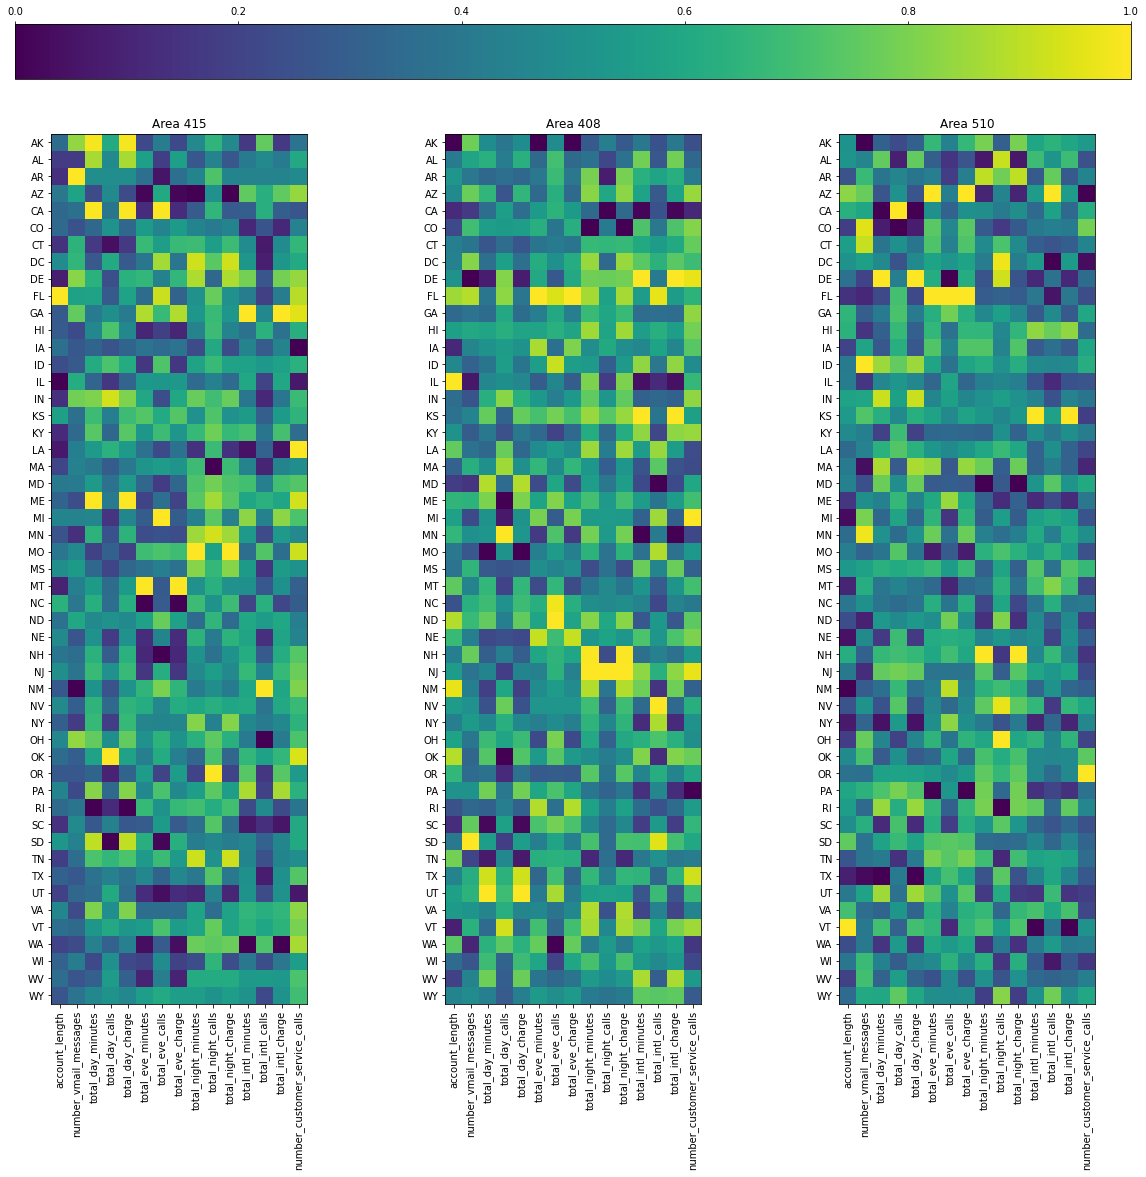

In [13]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
codes = ['415', '408', '510']
for i, ax in enumerate(axs.ravel()):
    col_data = group_means.filter(like='False', axis=0).filter(
        like=codes[i], axis=0).reset_index((1, 2)).drop(['area_code', 'churned'], axis=1)

    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(col_data.values)
    s_col_data = pd.DataFrame(
        x_scaled, columns=group_means.columns, index=col_data.index)

    ax.imshow(s_col_data, cmap='viridis')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=col_data.columns, rotation='vertical')
    ax.set_yticks(np.arange(col_data.shape[0]), labels=col_data.index)
plt.colorbar(axs[0].images[0], ax=axs, location='top');

Account lengths are generally low for each state and area of existing customers. 
### Churn group

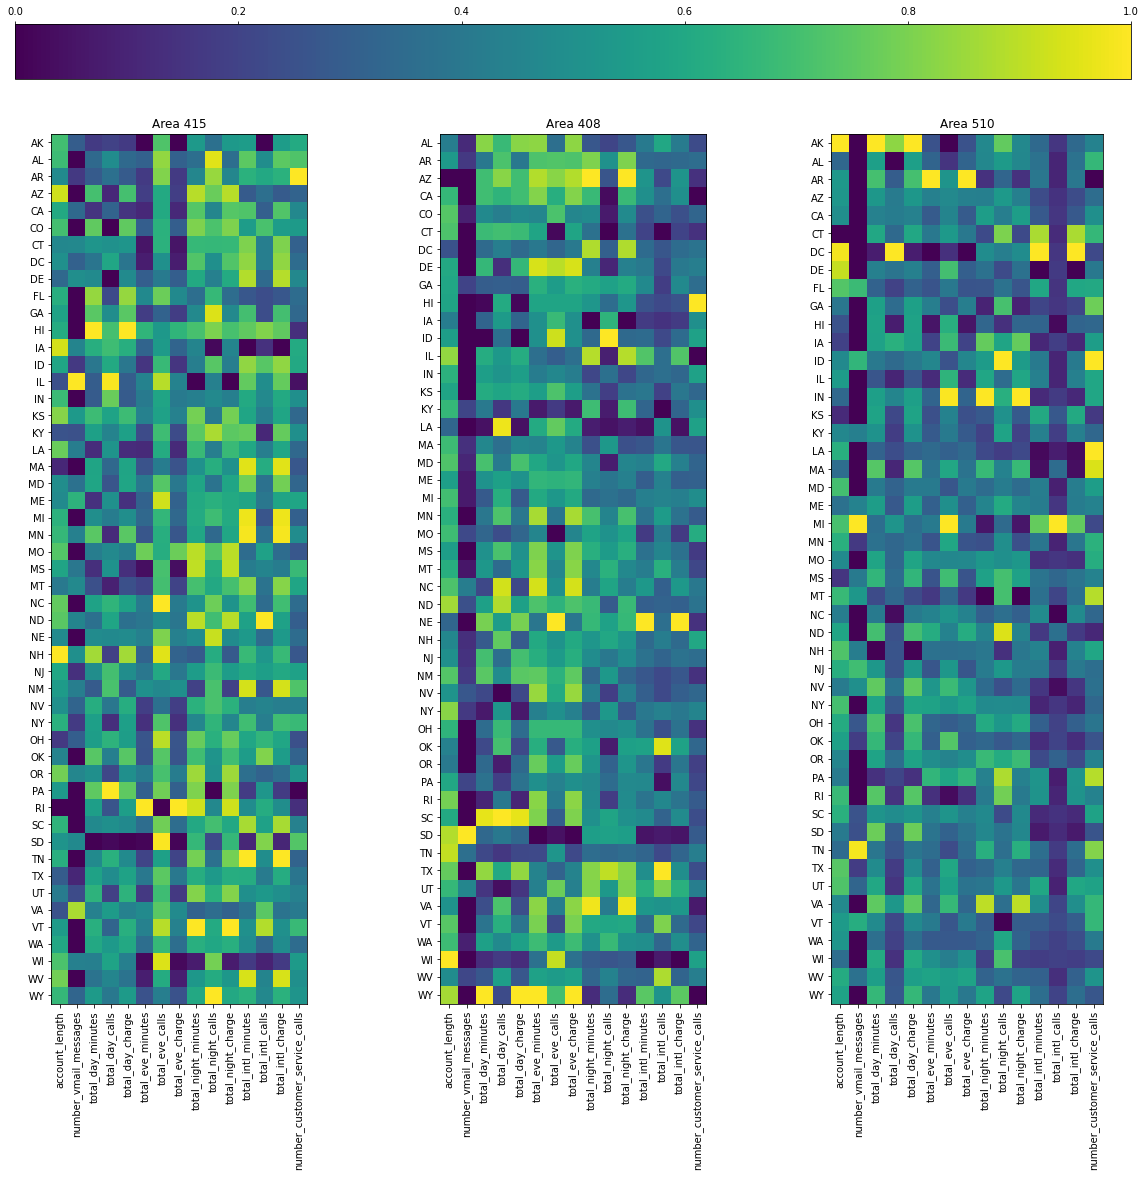

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
codes = ['415', '408', '510']
for i, ax in enumerate(axs.ravel()):
    col_data = group_means.filter(like='True', axis=0).filter(
        like=codes[i], axis=0).reset_index((1, 2)).drop(['area_code', 'churned'], axis=1)

    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(col_data.values)
    s_col_data = pd.DataFrame(
        x_scaled, columns=group_means.columns, index=col_data.index)

    ax.imshow(s_col_data, cmap='viridis')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=col_data.columns, rotation='vertical')
    ax.set_yticks(np.arange(col_data.shape[0]), labels=col_data.index)
plt.colorbar(axs[0].images[0], ax=axs, location='top');

Looking along the columns of area 408, there is a strong absence in `number_vmail_messages`. This is the easiest commonality to see, but with dimension reduction, like PCA, we can find more columns that have a strong indicator of churn. 

### Proportional Difference 
The following heatmap indicates which value is higher between existing customer and churn groups. If is is gray then the proportion is similar. Remeber these are proportions of the column means.


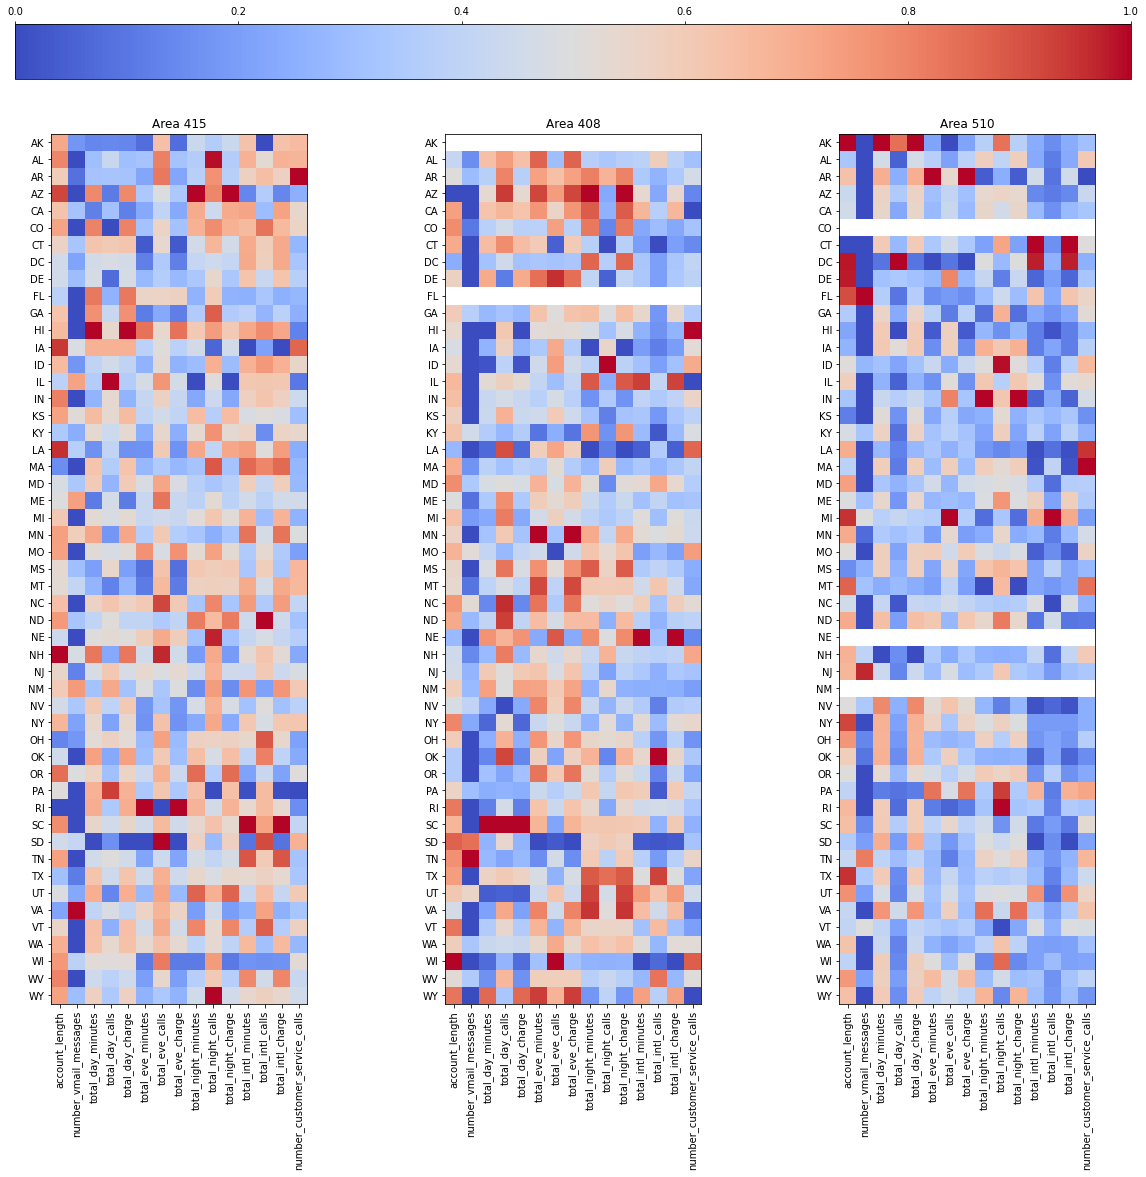

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
# coolwarm cmap
codes = ['415', '408', '510']
for i, ax in enumerate(axs.ravel()):
    churn = group_means.filter(like='True', axis=0).filter(like=codes[i], axis=0).reset_index(
        (1, 2)).drop(['area_code', 'churned'], axis=1)

    xist = group_means.filter(like='False', axis=0).filter(like=codes[i], axis=0).reset_index(
        (1, 2)).drop(['area_code', 'churned'], axis=1)

    propr = churn.div(xist, axis=0) #churn/xist

    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(propr.values)
    s_col_data = pd.DataFrame(
        x_scaled, columns=group_means.columns, index=propr.index)

    ax.imshow(s_col_data, cmap='coolwarm')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=propr.columns, rotation='vertical')
    ax.set_yticks(np.arange(propr.shape[0]), labels=propr.index)
plt.colorbar(axs[0].images[0], ax=axs, location='top');

Red means the churn customers had a higher value. Blue means the existing customers had a higher value. Completely white rows means data was absent in churn or existing customer group.

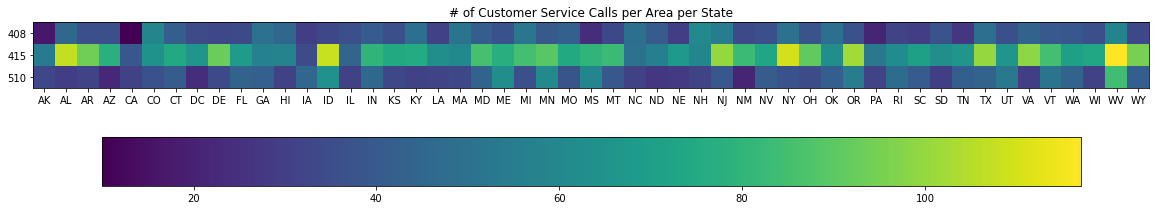

In [16]:
#Combined churned and not churned
table = pd.pivot_table(data, values='number_customer_service_calls', index=['state'],columns=['area_code'], aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(table.T,cmap='viridis')
plt.colorbar(orientation='horizontal')
ax.set_xticks(np.arange(51), labels=table.index)
ax.set_yticks(np.arange(3), labels=table.columns)
ax.set_title("# of Customer Service Calls per Area per State")
plt.show()

## Data Prep for Modeling

In [17]:
data.shape

(5000, 21)

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:19].values
y = data['churned'].values

labelencoder_X_1 = LabelEncoder()
X[:, 4] = labelencoder_X_1.fit_transform(X[:, 3])  # intl_plan

labelencoder_X_2 = LabelEncoder()
X[:, 5] = labelencoder_X_2.fit_transform(X[:, 4])  # voice_mail_column

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)  # churn

# OneHotEncoding with pandas

X = pd.DataFrame(X)  # Converting X to a dataframe

X = X.drop([0,3], axis=1)  # Dropping the 'State' & 'phone_number' columns

X_State = pd.get_dummies(data.iloc[:, 0], drop_first=True)
X_final = pd.concat([X, X_State], axis=1, ignore_index=True)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, random_state=6)

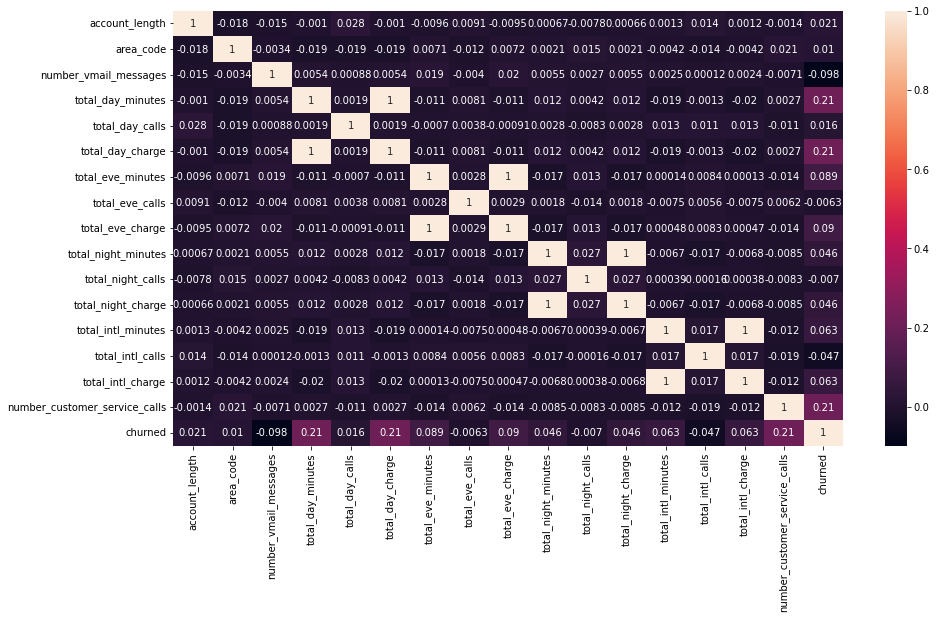

In [52]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(data.corr(), annot=True)

Weak correlation across all columns. Suggests the data is not linearly separable.

## Modeling
### PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# column transform non-numerical data TODO rather than remove
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('model', LogisticRegression())
                 ])

# No PCA
pipe2 = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('scaler', StandardScaler()),
                  ('model', LogisticRegression())
                  ])

pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)*100
pipe2.fit(X_train, y_train)
accuracy2 = pipe2.score(X_test, y_test)*100

print(f'PCA Model Accuracy: {accuracy}%')
print(f'Plain Model Accuracy: {accuracy2}%')

PCA Model Accuracy: 85.28%
Plain Model Accuracy: 86.96000000000001%


### Random Forest

In [29]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# RFC
pipe3 = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('model', RandomForestClassifier())
                  ])    
    
# Fit to the training data
pipe3.fit(X_train, y_train)
accuracy3 = pipe3.score(X_test, y_test)*100
print(f'RF Model Accuracy: {accuracy3}%')

RF Model Accuracy: 89.2%
